In [1]:
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults/
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
%ls

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults
HLFV_110GeV_AdditionalTree.root    HLFV_140GeV_AdditionalTree.root
HLFV_110GeV_SelectionResults.root  HLFV_140GeV_SelectionResults.root
HLFV_115GeV_AdditionalTree.root    HLFV_145GeV_AdditionalTree.root
HLFV_115GeV_SelectionResults.root  HLFV_145GeV_SelectionResults.root
HLFV_120GeV_AdditionalTree.root    ZHTaTa_AdditionalTree.root
HLFV_120GeV_SelectionResults.root  ZHTaTa_SelectionResults.root
HLFV_125GeV_AdditionalTree.root    ZHWW_AdditionalTree.root
HLFV_125GeV_SelectionResults.root  ZHWW_SelectionResults.root
HLFV_130GeV_AdditionalTree.root    ZWW4l_AdditionalTree.root
HLFV_130GeV_SelectionResults.root  ZWW4l_SelectionResults.root
HLFV_135GeV_AdditionalTree.root    ZZTaTa_AdditionalTree.root
HLFV_135GeV_SelectionResults.root  ZZTaTa_SelectionResults.root


In [18]:
# This creates a Python list of strings
file_list = glob.glob('*AdditionalTree.root')

In [19]:
def load_data(file_paths, tree_name):
    """
    Loads data from multiple ROOT files into a dictionary of Akward arrays.
    """
    data = {}
    for name, path in file_paths.items():
        print(f"Loading data from {path}...")
        try:
            with uproot.open(path) as file:
                tree = file[tree_name]
                data[name] = tree.arrays()
        except Exception as e:
            print(f"Error loading {path}: {e}")
            data[name] = None
    return data



file_paths = {}
for file_name in file_list:
    key = file_name.split('_AdditionalTree.root')[0]
    file_paths[key] = file_name


raw_data = load_data(file_paths,"Selection Results")


Loading data from HLFV_130GeV_AdditionalTree.root...
Loading data from ZHTaTa_AdditionalTree.root...
Loading data from HLFV_135GeV_AdditionalTree.root...
Loading data from ZZTaTa_AdditionalTree.root...
Loading data from HLFV_110GeV_AdditionalTree.root...
Loading data from HLFV_140GeV_AdditionalTree.root...
Loading data from ZWW4l_AdditionalTree.root...
Loading data from ZHWW_AdditionalTree.root...
Loading data from HLFV_145GeV_AdditionalTree.root...
Loading data from HLFV_125GeV_AdditionalTree.root...
Loading data from HLFV_120GeV_AdditionalTree.root...
Loading data from HLFV_115GeV_AdditionalTree.root...


In [20]:
raw_data['HLFV_110GeV'].fields

['Status_00_Lepton_PT',
 'Status_01_FinalState_4Leptons',
 'Status_02_Lepton_Odd',
 'Status_03_Charge_Violation',
 'Status_04_Z_Window',
 'Status_05_NotZ_dR',
 'Status_06_NotZ_MET_dPhi',
 'Status_07_NotZ_MassThreshold',
 'NearestZ_Mass',
 'OtherPair_Mass',
 'Z_PairIndexSum',
 'NotZ_dR',
 'NotZ_dPhi',
 'NotZ_EleMET_dPhi',
 'NotZ_MuMET_dPhi']

In [21]:
raw_data.keys()

dict_keys(['HLFV_130GeV', 'ZHTaTa', 'HLFV_135GeV', 'ZZTaTa', 'HLFV_110GeV', 'HLFV_140GeV', 'ZWW4l', 'ZHWW', 'HLFV_145GeV', 'HLFV_125GeV', 'HLFV_120GeV', 'HLFV_115GeV'])

In [22]:
# Pass Final Cut Statistics
for key in raw_data.keys():
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]['Status_05_NotZ_dR'])
    print(f"{key}: {passed_events} out of {total_events} events passed the final cut.")

HLFV_130GeV: 571782 out of 1000000 events passed the final cut.
ZHTaTa: 131199 out of 1000000 events passed the final cut.
HLFV_135GeV: 569267 out of 1000000 events passed the final cut.
ZZTaTa: 87210 out of 1000000 events passed the final cut.
HLFV_110GeV: 580589 out of 1000000 events passed the final cut.
HLFV_140GeV: 566225 out of 1000000 events passed the final cut.
ZWW4l: 53947 out of 1000000 events passed the final cut.
ZHWW: 138578 out of 1000000 events passed the final cut.
HLFV_145GeV: 563084 out of 1000000 events passed the final cut.
HLFV_125GeV: 573374 out of 1000000 events passed the final cut.
HLFV_120GeV: 575716 out of 1000000 events passed the final cut.
HLFV_115GeV: 578915 out of 1000000 events passed the final cut.


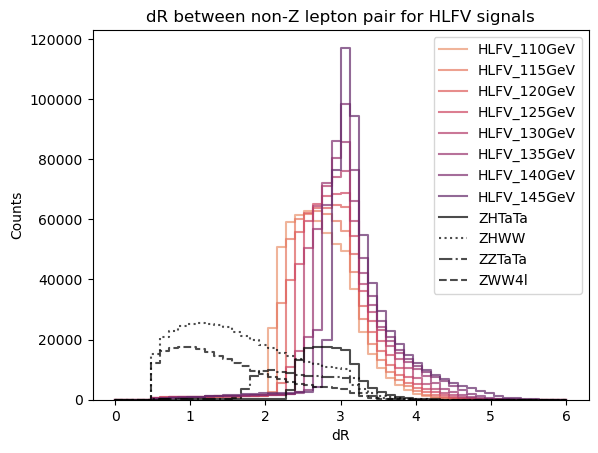

In [24]:
# plot NotZ_dR distribution for all LFV signals (layered)
plottype="NotZ_dR"
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype]#[a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=50, binrange=(0, 6), ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['ZHTaTa'][plottype], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="ZHTaTa")
sns.histplot(raw_data['ZHWW'][plottype], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dotted',
             stat="count", multiple="layer", label="ZHWW")
sns.histplot(raw_data['ZZTaTa'][plottype], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashdot',
             stat="count", multiple="layer", label="ZZTaTa")
sns.histplot(raw_data['ZWW4l'][plottype], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4l")
ax.set_title(f"dR between non-Z lepton pair for HLFV signals")
ax.set_xlabel("dR")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

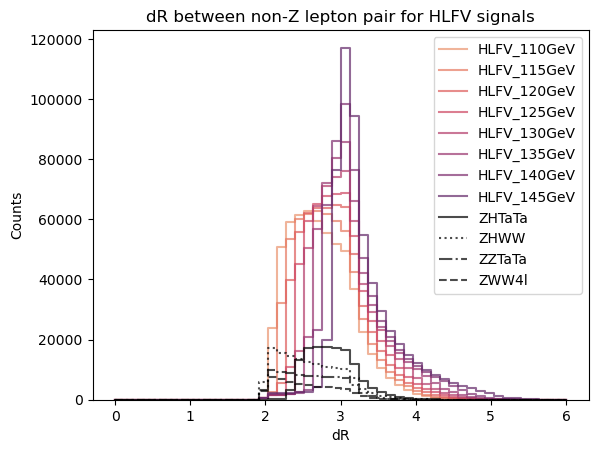

In [23]:
# plot NotZ_dR distribution for all LFV signals (layered)
plottype="NotZ_dR"
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=50, binrange=(0, 6), ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['ZHTaTa'][plottype][raw_data['ZHTaTa']['Status_05_NotZ_dR']==1], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="ZHTaTa")
sns.histplot(raw_data['ZHWW'][plottype][raw_data['ZHWW']['Status_05_NotZ_dR']==1], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dotted',
             stat="count", multiple="layer", label="ZHWW")
sns.histplot(raw_data['ZZTaTa'][plottype][raw_data['ZZTaTa']['Status_05_NotZ_dR']==1], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashdot',
             stat="count", multiple="layer", label="ZZTaTa")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4l")
ax.set_title(f"dR between non-Z lepton pair for HLFV signals")
ax.set_xlabel("dR")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

In [8]:
# plot the Chart of Yields after final cut
from turtle import pd


signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
bg_xsec = {
    "ZHTaTa": 2.19e-5,
    "ZHWW": 7.84e-5,
    "ZZTaTa": 1.52e-4,
    "ZWW4l": 2.691e-6
}
for masspoint in signalType:
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 10
    signal_last_cut_mask = raw_data[masspoint]['Status_05_NotZ_dR'] == 1
    signal_inside_mass_window = (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    signal_final_mask = signal_last_cut_mask & signal_inside_mass_window
    signal_yield_at_1ab = ak.sum(signal_final_mask) * 1e-6  # Since we started with 1 million events
    # Backgrounds in this mass
    
    bg_yields_at_1ab = {}
    for bg in bg_xsec.keys():
        bg_last_cut_mask = raw_data[bg]['Status_05_NotZ_dR'] == 1
        bg_inside_mass_window = (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        bg_final_mask = bg_last_cut_mask & bg_inside_mass_window
        bg_yield = ak.sum(bg_final_mask) * bg_xsec[bg] # Scale by cross-section
        bg_yields_at_1ab[bg] = bg_yield
    # Plot (dodge) Histrogram for each mass point but signal stacked with bgs


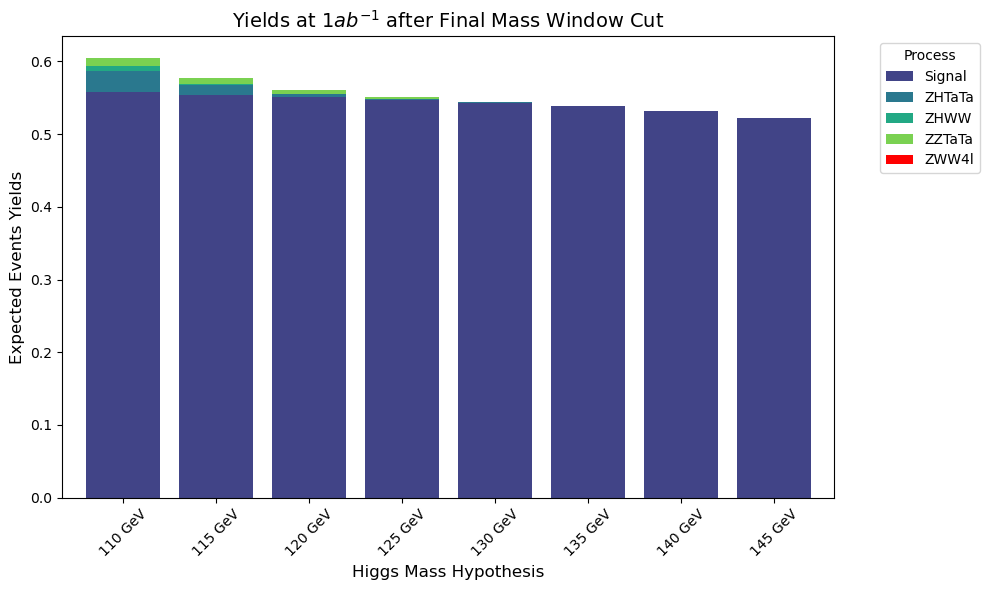

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
110 GeV,0.557353,0.029215,0.006821,0.010944,0.000124
115 GeV,0.554417,0.012943,0.002195,0.007296,0.000038
120 GeV,0.550543,0.004292,0.000784,0.004408,0.000008
125 GeV,0.546779,0.000898,0.000078,0.002888,0.000000
130 GeV,0.543496,0.000088,0.000000,0.000912,0.000000
135 GeV,0.538619,0.000000,0.000000,0.000304,0.000000
140 GeV,0.531481,0.000000,0.000000,0.000000,0.000000
145 GeV,0.522026,0.000000,0.000000,0.000000,0.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import awkward as ak

# Initialize a list to collect results for the plot
results_list = []
passed_list = []

# Your calculation loop (updated to store data)
for masspoint in signalType:
    # Extract numerical mass for label
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 10
    
    # Signal Calculation
    signal_mask = (raw_data[masspoint]['Status_05_NotZ_dR'] == 1) & \
                  (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    sig_yield = ak.sum(signal_mask) * 1e-6 
    sig_passed = ak.sum(signal_mask)
    
    # Collect signal and mass for this point
    entry = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_yield}
    bg_passed = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_passed}
    
    
    # Background Calculations for this specific mass window
    for bg, xsec in bg_xsec.items():
        bg_mask = (raw_data[bg]['Status_05_NotZ_dR'] == 1) & \
                  (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        
        entry[bg] = ak.sum(bg_mask) * xsec
        bg_passed[bg] = ak.sum(bg_mask)
        
    results_list.append(entry)
    passed_list.append(bg_passed)

# 1. Create DataFrame
df_plot = pd.DataFrame(results_list).set_index('MassPoint')

# 2. Plotting
# Use a color palette that distinguishes Signal from Backgrounds
colors = sns.color_palette("viridis", len(bg_xsec)) + [(1, 0, 0)] # Reds for Signal
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)

# 3. Styling
ax.set_title("Yields at $1 ab^{-1}$ after Final Mass Window Cut", fontsize=14)
ax.set_ylabel("Expected Events Yields", fontsize=12)
ax.set_xlabel("Higgs Mass Hypothesis", fontsize=12)
ax.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')

# Log scale is highly recommended if Background >> Signal
# ax.set_yscale('log') 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import awkward as ak

# Initialize lists to store data for the table
table_data = []

signalType = [
    "HLFV_110GeV", "HLFV_115GeV", "HLFV_120GeV", "HLFV_125GeV", 
    "HLFV_130GeV", "HLFV_135GeV", "HLFV_140GeV", "HLFV_145GeV",
    'ZHTaTa', 'ZHWW', 'ZZTaTa', 'ZWW4l'
]

# Map cross-sections for background (assuming pb or specific units from your code)
xsec_map = {
    "ZHTaTa": 21.9,
    "ZHWW": 78.4,
    "ZZTaTa": 152.0,
    "ZWW4l": 2.691
}

for key in signalType:
    total_events = len(raw_data[key]['Status_05_NotZ_dR'])
    passed_events = ak.sum(raw_data[key]['Status_05_NotZ_dR'])
    
    if key in xsec_map:
        # Background: Yield = (Passed / Generated) * Cross-Section * Target_Luminosity
        # Your logic: luminosity = total/xsec -> yield = passed/lumi 
        # This effectively calculates: Passed * (xsec / total)
        luminosity_scaling = total_events / xsec_map[key]
        yield_value = passed_events / luminosity_scaling
    else:
        # Signal: Efficiency (Yield per generated event)
        yield_value = passed_events / total_events

    # Append to list
    table_data.append({
        "Sample Type": key,
        "Total Events": total_events,
        "Passed Events": int(passed_events),
        "Efficiency (%)": (passed_events / total_events) * 100,
        "Yield (1 ab⁻¹)": f"{yield_value:.4e}" if not key.startswith("HLFV") else f"{yield_value:.6f}"
    })

# Create DataFrame
df_yields = pd.DataFrame(table_data)
# Assuming 'df_yields' is the DataFrame from the previous step

# 1. Convert the 'Yield (1 ab⁻¹)' column back to float if it was formatted as strings
df_yields['Yield (1 ab⁻¹)'] = pd.to_numeric(df_yields['Yield (1 ab⁻¹)'])

# 2. Set the display precision and suppress scientific notation
pd.options.display.float_format = '{:.4f}'.format

# 3. If you want to permanently change the values in the DataFrame for export:
df_yields['Yield (1 ab⁻¹)'] = df_yields['Yield (1 ab⁻¹)'].round(4)

# Display the table
# print(df_yields.to_string(index=False))
display(df_yields)

,Sample Type,Total Events,Passed Events,Efficiency (%),Yield (1 ab⁻¹)
0,HLFV_110GeV,1000000,580589,58.0589,0.5806
1,HLFV_115GeV,1000000,578915,57.8915,0.5789
2,HLFV_120GeV,1000000,575716,57.5716,0.5757
3,HLFV_125GeV,1000000,573374,57.3374,0.5734
4,HLFV_130GeV,1000000,571782,57.1782,0.5718
5,HLFV_135GeV,1000000,569267,56.9267,0.5693
6,HLFV_140GeV,1000000,566225,56.6225,0.5662
7,HLFV_145GeV,1000000,563084,56.3084,0.5631
8,ZHTaTa,1000000,131199,13.1199,2.8733
9,ZHWW,999999,138578,13.8578,10.8650


In [28]:
import pandas as pd

def latex_sci_notifier(x):
    # Handle zero exactly as requested
    if x == 0: 
        return "0"
    # Wrap in $ delimiters so Jupyter renders it as a math formula
    return f"{x:.6f}"

# Apply formatting and add a title
styled_table = df_plot.style.format(latex_sci_notifier) \
    .set_caption("Event Yields Around Mass Point") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Display the result
display(styled_table)

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
110 GeV,0.557353,0.029215,0.006821,0.010944,0.000124
115 GeV,0.554417,0.012943,0.002195,0.007296,0.000038
120 GeV,0.550543,0.004292,0.000784,0.004408,0.000008
125 GeV,0.546779,0.000898,0.000078,0.002888,0
130 GeV,0.543496,0.000088,0,0.000912,0
135 GeV,0.538619,0,0,0.000304,0
140 GeV,0.531481,0,0,0,0
145 GeV,0.522026,0,0,0,0


In [30]:
df_passed = pd.DataFrame(passed_list).set_index('MassPoint')
passed_table = df_passed.style.format() \
    .set_caption("Number of Events Around Mass Point") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])
display(passed_table)

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
110 GeV,557353,1334,87,72,46
115 GeV,554417,591,28,48,14
120 GeV,550543,196,10,29,3
125 GeV,546779,41,1,19,0
130 GeV,543496,4,0,6,0
135 GeV,538619,0,0,2,0
140 GeV,531481,0,0,0,0
145 GeV,522026,0,0,0,0


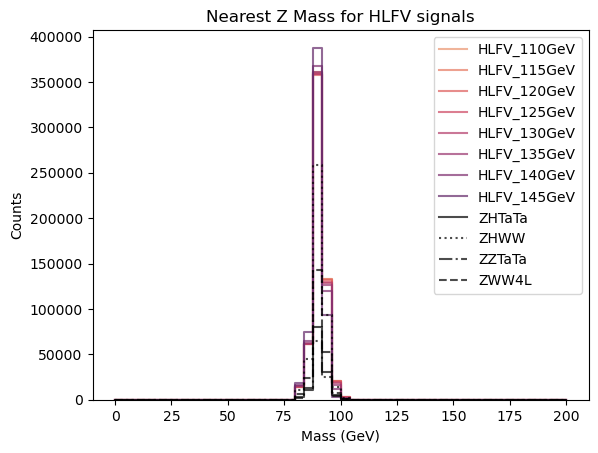

In [8]:
# plot NearestZ_Mass distribution for all LFV signals (layered)
plottype="NearestZ_Mass"
bins=50
binrange=(0, 200)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype]
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['ZHTaTa'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="ZHTaTa")
sns.histplot(raw_data['ZHWW'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dotted',
             stat="count", multiple="layer", label="ZHWW")
sns.histplot(raw_data['ZZTaTa'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashdot',
             stat="count", multiple="layer", label="ZZTaTa")
sns.histplot(raw_data['ZWW4l'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"Nearest Z Mass for HLFV signals")
ax.set_xlabel("Mass (GeV)")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

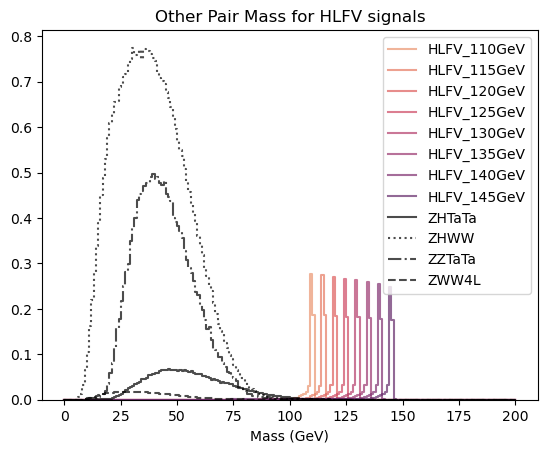

In [9]:
# plot NeareOtherPair_MassstZ_Mass distribution for all LFV signals (layered)
import numpy as np
plottype="OtherPair_Mass"
bins=200
binrange=(0, 200)
multipled_type="layer"
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype]
    sns.histplot(x=n_arr, bins=bins, binrange=binrange, ax=ax, fill=False, weights=np.ones_like(n_arr)*1e-6,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple=multipled_type, label=signal)
sns.histplot(x=raw_data['ZHTaTa'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False, weights=np.ones_like(raw_data['ZHTaTa'][plottype])*21.9e-6,
             element="step", alpha=0.7, color='black',
             stat="count", multiple=multipled_type, label="ZHTaTa")
sns.histplot(x=raw_data['ZHWW'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False, weights=np.ones_like(raw_data['ZHWW'][plottype])*78.4e-6,
             element="step", alpha=0.7, color='black', linestyle='dotted',
             stat="count", multiple=multipled_type, label="ZHWW")
sns.histplot(x=raw_data['ZZTaTa'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False, weights=np.ones_like(raw_data['ZZTaTa'][plottype])*152e-6,
             element="step", alpha=0.7, color='black', linestyle='dashdot',
             stat="count", multiple=multipled_type, label="ZZTaTa")
sns.histplot(x=raw_data['ZWW4l'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False, weights=np.ones_like(raw_data['ZWW4l'][plottype])*2.8e-6,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple=multipled_type, label="ZWW4L")
ax.set_title(f"Other Pair Mass for HLFV signals")
ax.set_xlabel("Mass (GeV)")
ax.set_ylabel("")
ax.legend()
plt.show()

KeyError: 'HZ4l'

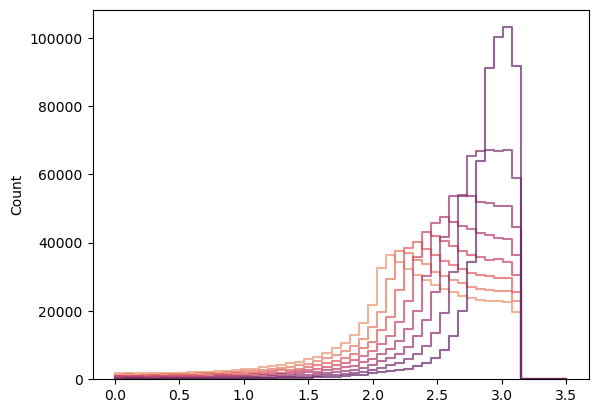

In [11]:
# plot NotZ_dPhi distribution for all LFV signals (layered)
plottype="NotZ_dPhi"
bins=50
binrange=(0, 3.5)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"NotZ dPhi for HLFV signals")
ax.set_xlabel("dPhi")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

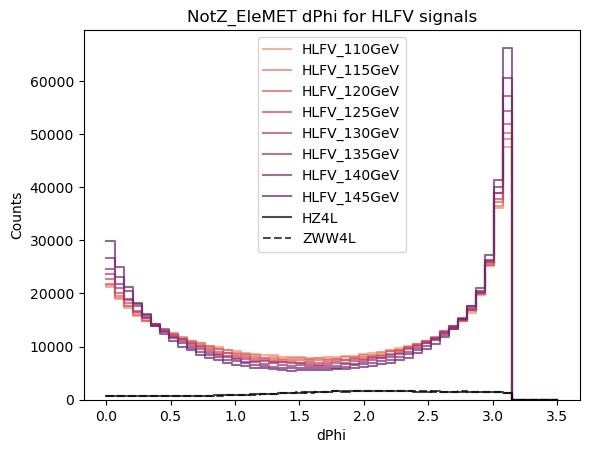

In [ ]:
# plot NotZ_EleMET_dPhi distribution for all LFV signals (layered)
plottype="NotZ_EleMET_dPhi"
bins=50
binrange=(0, 3.5)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"NotZ_EleMET dPhi for HLFV signals")
ax.set_xlabel("dPhi")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

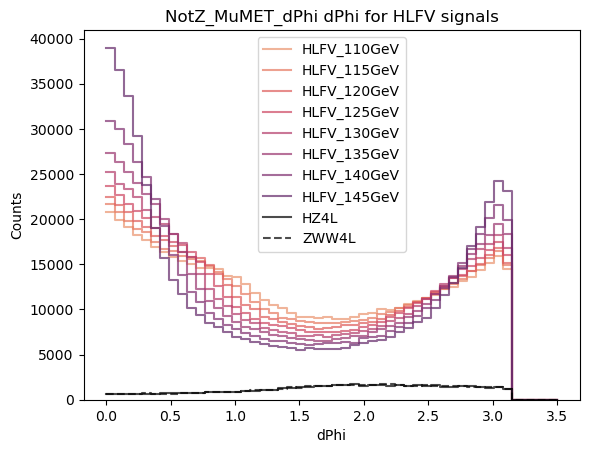

In [ ]:
# plot NotZ_MuMET_dPhi distribution for all LFV signals (layered)
plottype="NotZ_MuMET_dPhi"
bins=50
binrange=(0, 3.5)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"NotZ_MuMET_dPhi dPhi for HLFV signals")
ax.set_xlabel("dPhi")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

In [ ]:
['Status_00_Lepton_PT',
 'Status_01_FinalState_4Leptons',
 'Status_02_Lepton_Odd',
 'Status_03_Charge_Violation',
 'Status_04_Z_Window',
 'Status_05_NotZ_dR',
 'Status_06_NotZ_MET_dPhi',
 'NearestZ_Mass',
 'OtherPair_Mass',
 'Z_PairIndexSum',
 'NotZ_dR',
 'NotZ_dPhi',
 'NotZ_EleMET_dPhi',
 'NotZ_MuMET_dPhi']

['Status_00_Lepton_PT',
 'Status_01_FinalState_4Leptons',
 'Status_02_Lepton_Odd',
 'Status_03_Charge_Violation',
 'Status_04_Z_Window',
 'Status_05_NotZ_dR',
 'Status_06_NotZ_MET_dPhi',
 'NearestZ_Mass',
 'OtherPair_Mass',
 'Z_PairIndexSum',
 'NotZ_dR',
 'NotZ_dPhi',
 'NotZ_EleMET_dPhi',
 'NotZ_MuMET_dPhi']

In [ ]:
# calculate yield of 05_NotZ_dR cut
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV","HZ4l","ZWW4l"]
for key in signalType:
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]['Status_05_NotZ_dR'])
    if key not in ["ZHTaTa", "ZHWW", "ZZTaTa","ZZWW"]:
        yield_value = passed_events / total_events
        # print(f"{key}:{yield_value}")
    
    elif key == "HZ4l":
        luminosity = total_events/2.797 # N=xsec * luminosity
        yield_value =  passed_events/luminosity # scale to 1ab^-1 luminosity
        
    elif key == "ZWW4l":
        luminosity = total_events/2.691 # N=xsec * luminosity
        yield_value =  passed_events/luminosity # scale to 1ab^-1 luminosity
    print(f"{key} yield at 1ab^-1: {yield_value}")

HLFV_110GeV yield at 1ab^-1: 0.580589
HLFV_115GeV yield at 1ab^-1: 0.578915
HLFV_120GeV yield at 1ab^-1: 0.575716
HLFV_125GeV yield at 1ab^-1: 0.573374
HLFV_130GeV yield at 1ab^-1: 0.571782
HLFV_135GeV yield at 1ab^-1: 0.569267
HLFV_140GeV yield at 1ab^-1: 0.566225
HLFV_145GeV yield at 1ab^-1: 0.563084


KeyError: 'HZ4l'

In [ ]:
# calculate yield of 05_NotZ_dR cut
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV","HZ4l","ZWW4l"]
for key in signalType:
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]['Status_05_NotZ_dR'])
    if key not in ["HZ4l", "ZWW4l"]:
        yield_value = passed_events / total_events
        # print(f"{key}:{yield_value}")
    
    elif key == "HZ4l":
        luminosity = total_events # N=xsec * luminosity
        yield_value =  passed_events/luminosity # scale to 1ab^-1 luminosity
        
    elif key == "ZWW4l":
        luminosity = total_events # N=xsec * luminosity
        yield_value =  passed_events/luminosity # scale to 1ab^-1 luminosity
    print(f"{key} Pass: {passed_events}")

HLFV_110GeV Pass: 580589
HLFV_115GeV Pass: 578915
HLFV_120GeV Pass: 575716
HLFV_125GeV Pass: 573374
HLFV_130GeV Pass: 571782
HLFV_135GeV Pass: 569267
HLFV_140GeV Pass: 566225
HLFV_145GeV Pass: 563084
HZ4l Pass: 53880
ZWW4l Pass: 53947
